# Capstone Project - Dry Bars
### Applied Data Science Capstone by IBM/Coursera

## Table of Contents
1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Extract specific data](#analysis)
5. [Machine Learning and Results](#visuals)
6. [Conclusion](#conclusion)

---
## 1. Introduction: Business Problem<a name="introduction"></a>
---

With the objective of studying possible locations for the opening of a business that has not yet been explored in Brazil, this project brings the concept of the **Dry Bar**, with a proposal to identify suitable places that received this type of establishment, it requires a future extrapolation to other cities.

The **Dry Bar** concept emerged in California in 2010 and is based on offering fast beauty salon services, at prices that promise to be more affordable than in traditional spaces. Due to the facilities, agility and inviting prices, they have already become a common presence in cities such as New York and Los Angeles.

For the development of the project, the choice was to map a region of New York City, seeking to understand elements of geolocation and their relevance, for the installation of the Dry Bar. It is considered that this is a service dependent on the flow of people from the female, with little time available and profile that values good presentation in the work environment. These are determining factors for the success of this business model.


- Project's goal:

Find Dry Bars in the observation region, analyzing its surroundings from the study of clusters.
One way found to complement this study was to analyze the evaluations given by customers, considering that, in addition to the quality of service, the ease of access, an element related to location, is implicit. Thus, the objective is to try to understand the relationship of location of these groups and to seek similarities with the central region of the City of Rio de Janeiro.

The starting point was the mapping of the Midtown region, on Manhattan Island, which in addition to being one of the main tourist spots in New York City, is also home to numerous large companies, where, due to these characteristics, the profile of the city is concentrated. public for this type of business; women with lots of activities and little time for traditional beauty salons.

Based on these criteria, Foursquare will be used as a source of data for these areas. 

The ‘k-means clustering’ unsupervised learning algorithm will provide clarification of the advantages of each area, so that the best possible location is defined, for future referrals to those interested in implementing this business in downtown Rio de Janeiro.


<a name="data"></a>[Scroll Back to Table of Contents](#tableofContents)

---
## 2. Data <a name="data"></a>
---

Based on the problem definition, the data source was:

- **API do Foursquare:**

 Link: <https://developer.foursquare.com/docs>
    
Description: Foursquare API, a location data provider, will be used to make RESTful API calls to retrieve data about venues in different neighborhoods. This is the link to [Foursquare Venue Category Hierarchy](https://developer.foursquare.com/docs/resources/categories). Venues retrieved from all the neighborhoods are categorized broadly into "Arts & Entertainment", "College & University", "Event", "Food", "Nightlife Spot", "Outdoors & Recreation", etc. An extract of an API call is as follows:
```
	'categories': [{'id': '4bf58dd8d48988d110941735',
	   'name': 'Italian Restaurant',
	   'pluralName': 'Italian Restaurants',
	   'shortName': 'Italian',
	   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
	   'suffix': '.png'},
	   'primary': True}],
	'verified': False,
	'stats': {'tipCount': 17},
	'url': 'http://eccorestaurantny.com',
	'price': {'tier': 4, 'message': 'Very Expensive', 'currency'
```


<a name="methodology">[Scroll Back to Table of Contents](#tableofcontents)

---
## 3. Methodology<a name="methodology"></a>
---

> **3.1**  Download all the dependencies.

> **3.2**  Use the geopy library to find the latitude and longitude of the Manhattan district.

> **3.3**  From that location, use a radius of 9500 to search for Drybars in the region. 
The "query" is very important because the project is about a specific business and not a traditional beauty salon, as it is a relatively new trend it is likely that few returns will occur.

> **3.4**  View these establishments.


####  3.1 Download all the dependencies.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

pd.set_option('display.max_columns', None)     
pd.set_option('display.max_rows', None)        

import json # library to handle JSON files

#from pprint import pprint # data pretty printer    retirar

import requests # library to handle requests

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # map rendering library

import matplotlib.cm as cm # Matplotlib and associated plotting modules

import matplotlib.colors as colors # Matplotlib and associated plotting modules

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#from collections import Counter # count occurrences         retirar

from sklearn.cluster import KMeans # import k-means from clustering stage

from sklearn.metrics import silhouette_score

from collections import Counter # count occurrences 

import matplotlib.pyplot as plt

import seaborn as sns # plot the graph

from IPython.display import display, HTML, Image

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

#### 3.2 Using a geopy library to obtain the latitude and longitude values for the city of Manhattan.

In [2]:
address = 'Manhattan, NY'

location = None

# define an instance of the geocoder -> ny_explorer

while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


#### 3.3 Using a Foursquare API to search for Manhattan Drybars.

From that location, use a radius of 9500 to search for Drybars in the region. The "query" is very important because the project is about a specific business and not a traditional beauty salon, as it is a relatively new trend it is likely that few returns will occur. 

As used, a Foursquare API is used to explore the region's Drybars around the Manhattan point and segment it. To access an  API, 'CLIENT_ID','CLIENT_SECRET' and 'VERSION' is defined in a credentials file, in order to obtain a credential it is also enough to register at the following.[link](https://developer.foursquare.com/).

- Credentials for Foursquare API

In [3]:
CLIENT_ID = ' '# your Foursquare ID
CLIENT_SECRET = ' '# your Foursquare Secret
ACCESS_TOKEN = " "# your FourSquare Access Token
VERSION = ''

In [4]:
search_query = 'Drybar'
radius = 9500
LIMIT = 100
print(search_query + ' .... OK!')

Drybar .... OK!


- Get Response from Foursquare API

In [5]:
url_drybar = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    latitude, 
    longitude,
    ACCESS_TOKEN, 
    VERSION, 
    search_query, 
    radius,
    LIMIT)

url_drybar

'https://api.foursquare.com/v2/venues/search?client_id=P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO&client_secret=3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H&ll=40.7896239,-73.9598939&oauth_token=L5FWYDVVHZXJ4GKNOAD45X22X5MVYZJIFJHE1YJXFGDFB4YN&v=20180604&query=Drybar&radius=9500&limit=100'

In [6]:
# make the GET request
results_drybars= requests.get(url_drybar).json()

venues = results_drybars['response']['venues']

Transform the json result into a dataframe

In [7]:
df_drybar = json_normalize(venues)

df_drybar.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,5345ddce498e374167fa7173,DryBar,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1619349149,False,141 E 56th St,56th Street And Lexington Avenue,40.760087,-73.969126,"[{'label': 'display', 'lat': 40.76008684544023...",3378,10022,US,New York,NY,United States,[141 E 56th St (56th Street And Lexington Aven...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5a983849a5a3156b15012ff4,Drybar,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1619349149,False,243 W 99th St,NaN,40.796906,-73.970680,"[{'label': 'display', 'lat': 40.79690551757812...",1217,10025,US,New York,NY,United States,"[243 W 99th St, New York, NY 10025, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e6f679dae604d1b459a5154,DryBar,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1619349149,False,4 W 16th St,at 5th Ave,40.737554,-73.993193,"[{'label': 'display', 'lat': 40.73755376258029...",6440,10011,US,New York,NY,United States,"[4 W 16th St (at 5th Ave), New York, NY 10011,...",77545546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4f2064f8e4b0a00cf1d3c3c1,Drybar,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1619349149,False,119 W 56th St,btwn 6th & 7th Ave,40.764110,-73.978769,"[{'label': 'display', 'lat': 40.76410996501346...",3255,10019,US,New York,NY,United States,"[119 W 56th St (btwn 6th & 7th Ave), New York,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5b7d6c786fd626002c394614,Drybar,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1619349149,False,1495 3rd Ave,NaN,40.777626,-73.954491,"[{'label': 'display', 'lat': 40.77762603759765...",1411,10028,US,New York,NY,United States,"[1495 3rd Ave, New York, NY 10028, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check how many **Drybar** returned

In [8]:
df_drybar.shape

(41, 25)

There is some important information within the category variable, we are going to open and build a dataframe with the columns that include the name of the place the category that includes the Drybar and the location of each one of them.

In [9]:
filtered_columns = ['name', 'categories'] + [col for col in df_drybar.columns if col.startswith('location.')] + ['id']

dataframe_filtered=df_drybar.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# limpe os nomes das colunas mantendo apenas o último termo

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head(2)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,DryBar,Salon / Barbershop,141 E 56th St,56th Street And Lexington Avenue,40.760087,-73.969126,"[{'label': 'display', 'lat': 40.76008684544023...",3378,10022,US,New York,NY,United States,[141 E 56th St (56th Street And Lexington Aven...,NaN,5345ddce498e374167fa7173
1,Drybar,Salon / Barbershop,243 W 99th St,NaN,40.796906,-73.970680,"[{'label': 'display', 'lat': 40.79690551757812...",1217,10025,US,New York,NY,United States,"[243 W 99th St, New York, NY 10025, United Sta...",NaN,5a983849a5a3156b15012ff4


In [10]:
#Select the columns that matter

df_drybar_manhattan=dataframe_filtered[['id','name', 'categories', 'lat', 'lng']]

df_drybar_manhattan.head()

,id,name,categories,lat,lng
0,5345ddce498e374167fa7173,DryBar,Salon / Barbershop,40.760087,-73.969126
1,5a983849a5a3156b15012ff4,Drybar,Salon / Barbershop,40.796906,-73.970680
2,4e6f679dae604d1b459a5154,DryBar,Salon / Barbershop,40.737554,-73.993193
3,4f2064f8e4b0a00cf1d3c3c1,Drybar,Salon / Barbershop,40.764110,-73.978769
4,5b7d6c786fd626002c394614,Drybar,Salon / Barbershop,40.777626,-73.954491


In [11]:
df_drybar_manhattan.to_csv("df_drybar.csv" ,index= False)

- 3.5 View these establishments

In this view we can see the initial coordinate in red and the establishments in blue.

In [12]:
# Generate map centered around Manhattan New York

Manhattan_drybar_Map= folium.Map(location=[latitude, longitude], zoom_start=12)  

# add a red circle marker to represent the Midtown Manhattan

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Manhattan',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(Manhattan_drybar_Map)


# add the Dry Bars as blue circle markers


for lat, lng, label in zip(df_drybar_manhattan.lat, df_drybar_manhattan.lng, df_drybar_manhattan.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Manhattan_drybar_Map)

# display map


Manhattan_drybar_Map

It is possible to observe that the Drybars are concentrated in a part of the island of Manhattan and not in its entire extension. The spots are in the Midtown, Upper and Lower regions, three of the five that divide Manhattan Island. It is in these regions that large companies, several government agencies and different businesses are concentrated, in fact the proximity to others seems to have an influence on the choice of the location for the opening of this business model, since the other side of the island are examined residential areas. [link](https://www.rodei.com.br/amp/para-entender-melhor-os-bairros-de-manhattan-parte-ii/)





<a name="analysis"> [Scroll Back to Table of Contents](#tableofcontents)

---

## 4. Extract specific data<a name="#analysis"></a>
---

As part of the process, the next step is to seek evaluations given by customers, such as grades and likes, taking into account, implicitly, the quality of service and ease of access, with the intention of justifying the hypothesis that the most frequented and tanned establishments are at strategic points.

With Foursquare and later with the K-means algorithm, these strategic points can be known.

For other information they are within each ID of the establishment, therefore, it is important to pay attention to the request number in the Foursquare API, so as not to extrapolate a daily quota of 50 requests. In this case, 41 requests were made to obtain the information.

In [15]:
df_rating=pd.read_csv("data/rating.csv",encoding='iso-8859-1',delimiter =';')

df_rating.head(2)

,id,name,rating,like,text
0,5345ddce498e374167fa7173,DryBar,8.4,62,My favorite Dry Bar! The stylists know how to ...
1,4f2064f8e4b0a00cf1d3c3c1,DryBar,8.0,62,The only place where mixing a Manhattan and a ...


In [16]:
#dim
df_rating.shape

(41, 5)

Now, join the first dataframe that contains the category and the location of each Drybar with the second dataframe that contains notes and likes.

In [17]:
df_drybar_manhattan.head(2)

,id,name,categories,lat,lng
0,5345ddce498e374167fa7173,DryBar,Salon / Barbershop,40.760087,-73.969126
1,5a983849a5a3156b15012ff4,Drybar,Salon / Barbershop,40.796906,-73.970680


In [18]:
df=pd.merge( df_drybar_manhattan,df_rating, on=["id"], how="inner")

df.head()

,id,name,categories,lat,lng,name,rating,like,text
0,5345ddce498e374167fa7173,DryBar,Salon / Barbershop,40.760087,-73.969126,DryBar,8.4,62,My favorite Dry Bar! The stylists know how to ...
1,5a983849a5a3156b15012ff4,Drybar,Salon / Barbershop,40.796906,-73.970680,Dry Bar,NaN,0,NaN
2,4e6f679dae604d1b459a5154,DryBar,Salon / Barbershop,40.737554,-73.993193,DryBar,8.5,142,Uncharged? No worries! You can charge your iPh...
3,4f2064f8e4b0a00cf1d3c3c1,Drybar,Salon / Barbershop,40.764110,-73.978769,DryBar,8.0,62,The only place where mixing a Manhattan and a ...
4,5b7d6c786fd626002c394614,Drybar,Salon / Barbershop,40.777626,-73.954491,Drybar,NaN,1,NaN


With the Fousquare search data previously organized, the next step will be to use the machine learning algorithm for extra information that will be transformed into knowledge later.

<a name="Machine Learning and Results"> [Scroll Back to Table of Contents](#tableofcontents)

## 5. Machine Learning and Results<a name="visuals"></a>


The unsupervised Machine Learning algorithm “K-means” groups data by similarities around each other around a central point, the centroid. For processing they are given as input variables, in this case they will be as latitudes and longitudes and as output it returns groups, called clusters.

To implement this algorithm, it is very important to determine the optimal number of clusters (that is, k). There are 2 most popular methods for this, namely 'The Elbow Method' and 'The Silhouette Method'.

> 5.1 Elbow and Silhouette method for choosing which values

> 5.2 K-means with k selected

> 5.3 Cluster visualization 

#### 5.1 The Elbow Method


The Elbow Method calculates the sum of squared distances of samples to their closest cluster center for different values of 'k'. The optimal number of clusters is the value after which there is no significant decrease in the sum of squared distances. Following is an implementation of this method (with varying number of clusters from 1 to 20):



In [19]:
#Selected the lon and lat variables for the K-means algorithm.
cluster_dataset=df[["lat","lng"]]
cluster_dataset.head(2)

,lat,lng
0,40.760087,-73.969126
1,40.796906,-73.970680


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 

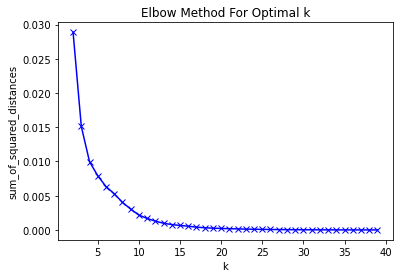

In [20]:
# K-means method Elbow.

sum_of_squared_distances = []

K = range(2,40)

for k in K:
    print(k, end=' ')
    
    kmeans_ = KMeans(n_clusters=k, random_state=0, n_init=20).fit(cluster_dataset)
    sum_of_squared_distances.append(kmeans_.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

The elbow method does not seem to help us determine the ideal number of curls.

Sometimes, Elbow method does not give the required result, which did not happen in this case. If there was a gradual decrease in the sum of squared distances, an optimal number of clusters could not be determined. To counter this, another method can be implemented, such as the Silhouette Method. 

#### 5.1The Silhouette Method

Silhouette analysis measures how well a point fits into a cluster (cohesion of the points). In this method, a graph is made measuring the proximity of the points of one cluster to the points of another nearest cluster. The Silhouette coefficient when close to +1, indicates that the points are very distant from the points of the other cluster, and when close to 0, it indicates that the points are very close or even crossing with another cluster. (Separation of points)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 

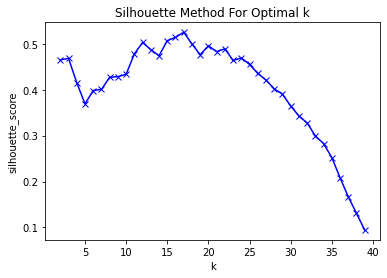

In [23]:
sil = []

K_sil = range(2,40)

# minimum 2 clusters required, to define dissimilarity

for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(cluster_dataset)
    labels = kmeans.labels_
    sil.append(silhouette_score(cluster_dataset, labels, metric = 'euclidean')) 
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()



It is possible to see in the graph two peaks, the first approximately between 11 and 14 and the second between 15 and 17, for the data scientist the decision between choosing which one has the best for k is personal, but in the case of the project with a small sample of data is not very interesting to have many clusters.

When choosing the first peak of the chart, it is not yet known which is the best value for 11.12, 13 or 14, which would be the best among them?

It is not always possible to make this decision just by looking at the graphs, so it is important to check through the values of the silhouette coefficients, as shown below.

In [24]:
for i in range(11,15):
    
  kmeans = KMeans(n_clusters=i).fit(cluster_dataset)
  labels = kmeans.labels_
    
  coef = silhouette_score(cluster_dataset,labels)
  print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 11, score: 0.4850895353478352
N_cluster: 12, score: 0.5030107466088135
N_cluster: 13, score: 0.4950326882908053
N_cluster: 14, score: 0.44864483917230397


#### 5.2 K-means with k selected

According to the graph the best value for k would be: **K=12**

In [26]:
# run k-means clustering

kclusters =12

kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(cluster_dataset)
labels = kmeans.labels_
print(len(Counter(labels)))

12


- Include cluster labels on the dataframe

In [27]:
df.insert(0, 'ClusterLabels', labels)

In [28]:
df.head()

,ClusterLabels,id,name,categories,lat,lng,name,rating,like,text
0,3,5345ddce498e374167fa7173,DryBar,Salon / Barbershop,40.760087,-73.969126,DryBar,8.4,62,My favorite Dry Bar! The stylists know how to ...
1,1,5a983849a5a3156b15012ff4,Drybar,Salon / Barbershop,40.796906,-73.970680,Dry Bar,NaN,0,NaN
2,6,4e6f679dae604d1b459a5154,DryBar,Salon / Barbershop,40.737554,-73.993193,DryBar,8.5,142,Uncharged? No worries! You can charge your iPh...
3,3,4f2064f8e4b0a00cf1d3c3c1,Drybar,Salon / Barbershop,40.764110,-73.978769,DryBar,8.0,62,The only place where mixing a Manhattan and a ...
4,5,5b7d6c786fd626002c394614,Drybar,Salon / Barbershop,40.777626,-73.954491,Drybar,NaN,1,NaN


####  5.3 Cluster visualization

Finally, let's visualize the resulting clusters

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))

rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(df['lat'], df['lng'], df['name'], df['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(map_clusters)
       
map_clusters

## Getting to know the clusters

####  Average Rating of each cluster

In [47]:
rating_cluster=df.groupby(["ClusterLabels"])["rating"].mean()
rating_cluster

ClusterLabels
0     7.266667
1          NaN
2     7.100000
3     7.900000
4          NaN
5     7.700000
6     7.500000
7          NaN
8     7.500000
9     8.100000
10    7.000000
11    7.400000
Name: rating, dtype: float64

Clusters 3 and 9 have the highest average, only these two groups will serve as a parameter for the completion of the project, for which all establishments related to each of these clusters are selected.

- Cluster 5:

In [57]:
cluster_3= df[df["ClusterLabels"]==3]
cluster_3.head()

,ClusterLabels,id,name,categories,lat,lng,name,rating,like,text
0,3,5345ddce498e374167fa7173,DryBar,Salon / Barbershop,40.760087,-73.969126,DryBar,8.4,62,My favorite Dry Bar! The stylists know how to ...
3,3,4f2064f8e4b0a00cf1d3c3c1,Drybar,Salon / Barbershop,40.764110,-73.978769,DryBar,8.0,62,The only place where mixing a Manhattan and a ...
7,3,5db77e4d10a19d000875e753,Drybar,Health & Beauty Service,40.766853,-73.981578,Drybar,NaN,0,NaN
30,3,55354a66498e43895e540020,Gabriel Shimunov Hair Salon,Salon / Barbershop,40.764275,-73.977090,Gabriel Shimunov Hair Salon,7.3,6,The service here is top notch! Love my hair af...
34,3,576ab85f498ea7d347c23267,Blo Blow Dry Bar,Health & Beauty Service,40.755502,-73.972220,Blo Blow Dry Bar,NaN,1,NaN


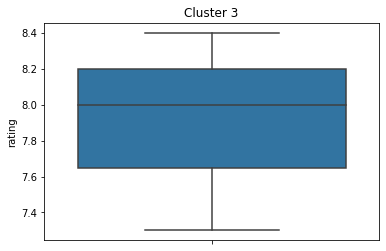

In [58]:
sns.boxplot(y=cluster_3["rating"])
plt.title('Cluster 3')
plt.show()


Cluster 3 has a good concentration of grades considered good above 7.5 (as shown in the graph above).

- Cluster 11

In [59]:
cluster_9= df[df["ClusterLabels"]==9]
cluster_9.shape

(1, 10)

Cluster 9, on the other hand, has only 1 element, that is, 1 establishment, for this reason it is not necessary to plot the graph, but as its score had a significant value it is worth knowing the categories of its neighboring establishments.

##  Explore the neighborhoods of clusters 3 and 9

The k-means algorithm returns not only the clusters, but also the central point of each of them, the centroid.

Given these centroides, a new search will be made on Foursquare to find out about the categories of establishments neighboring DryBars within a radius of 300 meters. The choice of 300 meters was random and intuitive.

In [60]:
# Knowing the centroid and saving to a list

center=kmeans.cluster_centers_

center=center.tolist()


Get a dataframe with the latitude and longitude of each cluster.

In [61]:
df=df.rename(columns={"like ":'likes'} )

In [67]:
# Create lists with latitudes and longitudes  
label=[0,1,2,3,4,5,6,7,8,9,10,11]

lat_centroid=[]
lng_centroid=[]

for i  in range(len(center)):
    
    lat_centroid.append(center[i][0])
    lng_centroid.append(center[i][1]) 
    
# dataframe    
    
DIC={'labels':label,'latitude': lat_centroid,'longitude':lng_centroid}
df_cluster_centroid=pd.DataFrame(DIC)

df_cluster_centroid.head()

,labels,latitude,longitude
0,0,40.747010,-73.982542
1,1,40.797727,-73.969277
2,2,40.716337,-74.006590
3,3,40.762165,-73.975756
4,4,40.894594,-73.973763


###  Do a new API search with the cluster 3 and 9 centroides

GET response from Foursquare API categories

In [64]:
# GET Response from Foursquare API
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
category_results = requests.get(categories_url).json()
category_results = category_results['response']['categories']


# Transforming Json to DataFrame
categories = pd.json_normalize(data=category_results)



# Cleaning DataFrame
categories = categories.drop(columns=['pluralName'
                             ,'shortName'
                             ,'categories'
                             ,'icon.prefix'
                             ,'icon.suffix'])

categories = categories.rename(columns={'id':'category_id',
                                         'name':'category_name'})
categories

,category_id,category_name
0,4d4b7104d754a06370d81259,Arts & Entertainment
1,4d4b7105d754a06372d81259,College & University
2,4d4b7105d754a06373d81259,Event
3,4d4b7105d754a06374d81259,Food
4,4d4b7105d754a06376d81259,Nightlife Spot
5,4d4b7105d754a06377d81259,Outdoors & Recreation
6,4d4b7105d754a06375d81259,Professional & Other Places
7,4e67e38e036454776db1fb3a,Residence
8,4d4b7105d754a06378d81259,Shop & Service
9,4d4b7105d754a06379d81259,Travel & Transport


Put all Foursquare API categories in one list

In [65]:
list_category=categories["category_id"]

Search the categories of all clusters

In [70]:
category_id = list_category
radius=300
results=[]

for index in df_cluster_centroid.index:
    
    for category_id in list_category:
        latitude = df_cluster_centroid["latitude"][index]
        longitude = df_cluster_centroid["longitude"][index]
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, CLIENT_SECRET, VERSION, latitude,longitude,radius,category_id)
  

        results.append(requests.get(url).json())
    
#print(results)

In [71]:
len(results)

120

Obtain a dataframe with the categories of each cluster

In [74]:
cluster_centroide=pd.DataFrame(columns=["Count","categories"])

for item in results:
    
    total=item['response']['totalResults']
    names=item["response"]["query"]
    cluster_centroide=cluster_centroide.append({"Count":total,"categories":names},ignore_index= True)
    

In [75]:
cluster_centroide.head()

,Count,categories
0,15,arts entertainment
1,52,college education
2,0,event
3,51,food
4,26,nightlife


Add the labels

In [77]:
total = cluster_centroide['Count'].tolist()
categ = list(cluster_centroide['categories'])

#catg = []
tot = []
cluster = []
index = 0

df_12_clusters= pd.DataFrame(columns = ['Cluster','Categories','Total'])
for cl in range(0,12):
    for ca in range(0,10):
    # print(cl,ca)
        tot = total[index]
        cat = categ[index]
        index = index+1
        df_12_clusters = df_12_clusters.append({'Cluster':cl,'Categories':cat, 'Total':tot},ignore_index=True)

In [81]:
df_12_clusters.head()

,Cluster,Categories,Total
0,0,arts entertainment,15
1,0,college education,52
2,0,event,0
3,0,food,51
4,0,nightlife,26


### Analisys do cluster 3 

In [83]:
df_3=df_12_clusters[df_12_clusters["Cluster"]==3]

- Preview

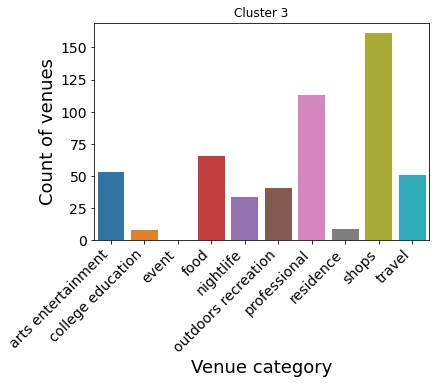

In [92]:
# cluster3

ax = sns.barplot(x="Categories", y="Total", data=df_3)
ax.set_ylabel('Count of venues', fontsize=18)
plt.title("Cluster 3")
ax.set_xlabel('Venue category', fontsize=18)
ax.tick_params(labelsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

### Analisys do cluster 9

In [93]:
df_9=df_12_clusters[df_12_clusters["Cluster"]==9]

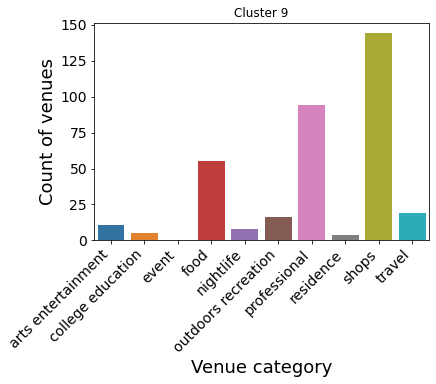

In [94]:
# cluster11

ax = sns.barplot(x="Categories", y="Total", data=df_9)
ax.set_ylabel('Count of venues', fontsize=18)
ax.set_xlabel('Venue category', fontsize=18)
plt.title("Cluster 9")
ax.tick_params(labelsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

There is a high concentration of categories such as shop and professional in both cases, these own categories, such as: Business Center, Distribution Center, Town Hall, Industrial Estate, Wedding Hall, etc. To know more details, it is necessary to specify the search even more, which will be for another moment, with this information it is possible to draw some conclusions.

---
## 6. Conclusion <a name="conclusion"></a>
---